In [4]:
import numpy as np
import os
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# === PATHS SETUP ===
SCRIPT_PATH = os.getcwd()
DATA_DIR = os.path.abspath(os.path.join(SCRIPT_PATH, '..', '..', 'data', 'preprocessed', 'time_window_data'))
MODELS_DIR = os.path.abspath(os.path.join(SCRIPT_PATH, '..', '..', 'models', 'gnb_timeseries'))
os.makedirs(MODELS_DIR, exist_ok=True)

In [6]:
# === LOAD PREPROCESSED DATA ===
print("Loading data...")
train_data = np.load(os.path.join(DATA_DIR, 'train.npz'))
X_train = train_data['X']
y_train = train_data['y']

val_data = np.load(os.path.join(DATA_DIR, 'val.npz'))
X_val = val_data['X']
y_val = val_data['y']

test_data = np.load(os.path.join(DATA_DIR, 'test.npz'))
X_test = test_data['X']
y_test = test_data['y']

# Load label encoder
label_encoder = joblib.load(os.path.join(DATA_DIR, 'label_encoder.pkl'))
target_names = label_encoder.classes_

Loading data...


In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# === Combining Validation and test sets ===
X_test_flat = np.concatenate((X_test_flat, X_val_flat), axis=0)
y_test = np.concatenate((y_test, y_val), axis=0)

In [8]:
# === TRAIN GAUSSIAN NAIVE BAYES ===
gnb = GaussianNB()
gnb.fit(X_train_flat, y_train)


,priors,None
,var_smoothing,1e-09



Accuracy: 0.8428

Classification Report:
               precision    recall  f1-score   support

      faulty       0.85      0.90      0.88     11186
  faulty_zip       0.90      0.85      0.87     11186
     healthy       0.83      0.79      0.81     11186
 healthy_zip       0.80      0.84      0.82     11186

    accuracy                           0.84     44744
   macro avg       0.84      0.84      0.84     44744
weighted avg       0.84      0.84      0.84     44744



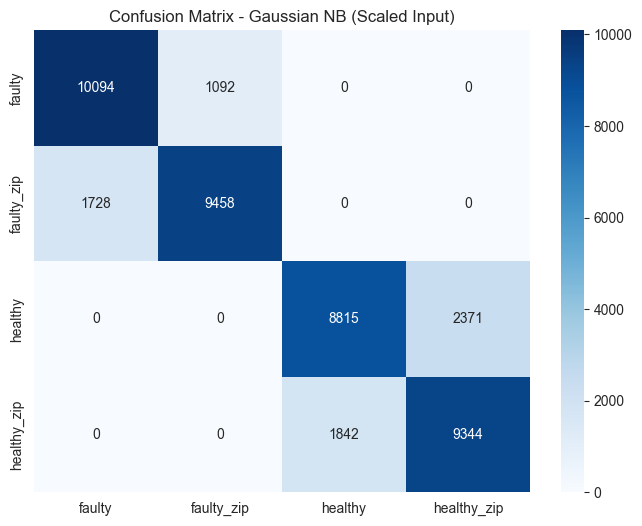

In [9]:
y_pred = gnb.predict(X_test_flat)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Gaussian NB (Scaled Input)')
plt.show()

In [10]:
# === SAVING MODEL ===
model_filename = 'gnb_timeseries.pkl'
model_path = os.path.join(MODELS_DIR, model_filename)
joblib.dump(gnb, model_path)
print(f"\nModel saved to: {model_path}")


Model saved to: C:\Users\Jakub\Kuba_lokalne\studia\Praca_magisterska\Projekt\Fault-detection-in-mechanical-devices\models\gnb_timeseries\gnb_timeseries.pkl
